In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd

# Attempt to load the dataset with a specified encoding
try:
    df = pd.read_csv(r'F:\7. Seventh Seemester Degeree\ML Assignments\clustering\sales_data_sample.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    # If it fails, try a different encoding
    df = pd.read_csv(r'F:\7. Seventh Seemester Degeree\ML Assignments\clustering\sales_data_sample.csv', encoding='utf-16')

# Display the first few rows of the dataset
print(df.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [4]:
# Select relevant features for clustering
# Assuming the columns 'SALES' and 'QUANTITYORDERED' exist in the dataset
df_selected = df[['SALES', 'QUANTITYORDERED']]

# Handle missing values by dropping rows with any NaN values
df_selected = df_selected.dropna()

# Display the selected data
print(df_selected.head())


     SALES  QUANTITYORDERED
0  2871.00               30
1  2765.90               34
2  3884.34               41
3  3746.70               45
4  5205.27               49


In [5]:
# Import the scaler
from sklearn.preprocessing import StandardScaler

# Standardize the selected features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Check the scaled data
print(df_scaled[:5])


[[-0.37082523 -0.52289086]
 [-0.42789707 -0.11220131]
 [ 0.17944282  0.60650538]
 [ 0.10470098  1.01719493]
 [ 0.89673966  1.42788447]]


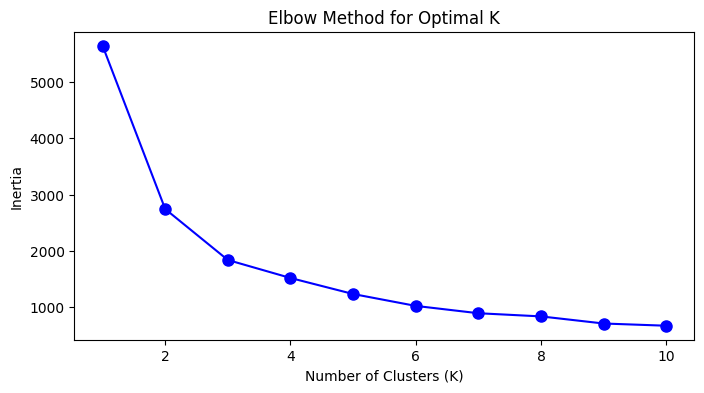

In [6]:
# Import necessary libraries for clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)  # We will try K values from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [7]:
# Based on the elbow plot, choose the optimal number of clusters
optimal_k = 3  # Modify this based on the elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the data with the cluster labels
print(df[['SALES', 'QUANTITYORDERED', 'Cluster']].head())


     SALES  QUANTITYORDERED  Cluster
0  2871.00               30        0
1  2765.90               34        1
2  3884.34               41        1
3  3746.70               45        1
4  5205.27               49        2


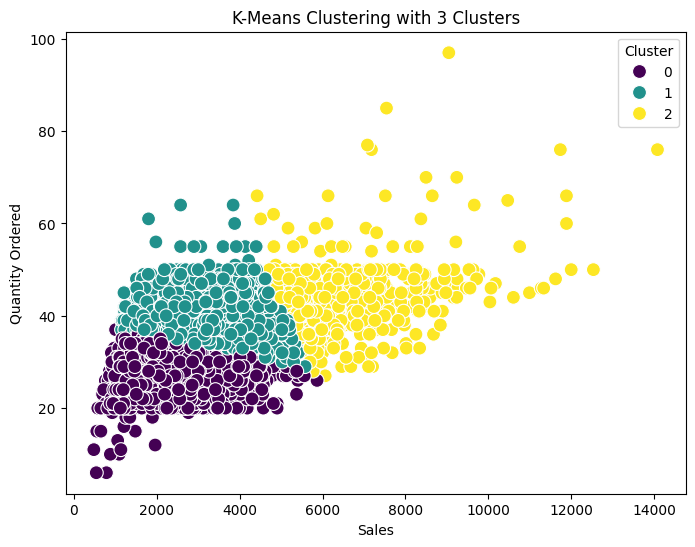

In [8]:
# Import the necessary library for visualization
import seaborn as sns

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_selected['SALES'], y=df_selected['QUANTITYORDERED'], hue=df['Cluster'], palette='viridis', s=100)
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Sales')
plt.ylabel('Quantity Ordered')
plt.show()


In [9]:
# Calculate the average sales per cluster
cluster_analysis = df.groupby('Cluster')['SALES'].mean()
print(cluster_analysis)


Cluster
0    2428.951269
1    3404.898964
2    6580.416500
Name: SALES, dtype: float64


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

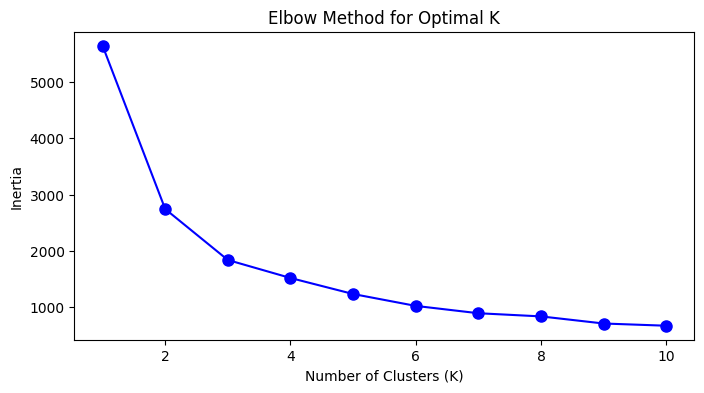

     SALES  QUANTITYORDERED  Cluster
0  2871.00               30        0
1  2765.90               34        1
2  3884.34               41        1
3  3746.70               45        1
4  5205.27               49        2


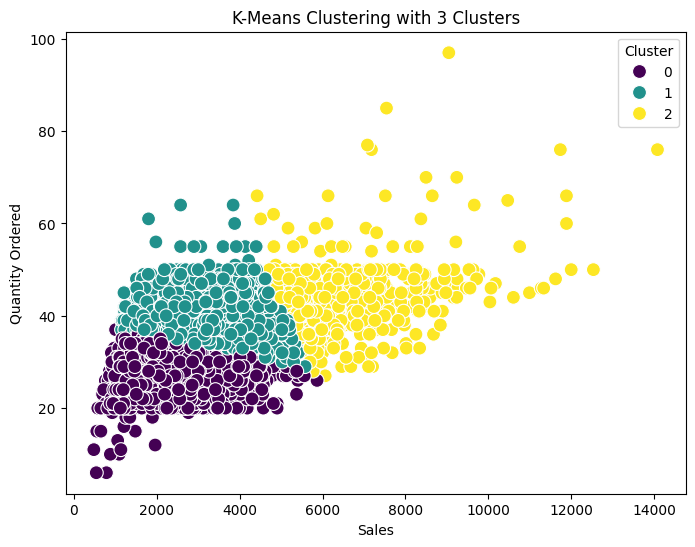

Cluster
0    2428.951269
1    3404.898964
2    6580.416500
Name: SALES, dtype: float64


In [11]:
# Step-by-step code for K-Means clustering

# Step 1: Load the Dataset
import pandas as pd
try:
    df = pd.read_csv(r'F:\7. Seventh Seemester Degeree\ML Assignments\clustering\sales_data_sample.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    # If it fails, try a different encoding
    df = pd.read_csv(r'F:\7. Seventh Seemester Degeree\ML Assignments\clustering\sales_data_sample.csv', encoding='utf-16')

# Display the first few rows of the dataset
print(df.head())

# Step 2: Preprocess the Data
df_selected = df[['SALES', 'QUANTITYORDERED']]
df_selected = df_selected.dropna()
print(df_selected.head())

# Step 3: Standardize the Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)
print(df_scaled[:5])

# Step 4: Elbow Method to Find Optimal K
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Step 5: Apply K-Means with Optimal K
optimal_k = 3  # Set based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
print(df[['SALES', 'QUANTITYORDERED', 'Cluster']].head())

# Step 6: Visualize the Clusters
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_selected['SALES'], y=df_selected['QUANTITYORDERED'], hue=df['Cluster'], palette='viridis', s=100)
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Sales')
plt.ylabel('Quantity Ordered')
plt.show()

# Step 7: Analyze the Clusters
cluster_analysis = df.groupby('Cluster')['SALES'].mean()
print(cluster_analysis)
